In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns
import tensorflow as tf
import copy, math

In [4]:
df = pd.read_csv("/Users/mohamadrezasalehi/Journey/Kaggle trainings/Breast Cancer/data.csv")

In [5]:
df.head(n = 10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [6]:
col = df.columns       # .columns gives columns names in data 
print(col)

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [7]:
y = df["diagnosis"]

In [33]:
lst =["id", "diagnosis", "Unnamed: 32"]
X = df.drop(lst, axis = 1)
df = df.drop(["id", "Unnamed: 32"], axis = 1)

In [9]:
y.head(n = 5)

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: object

In [10]:
X.head(n = 10)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


In [11]:
X.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [12]:
y.describe()

count     569
unique      2
top         B
freq      357
Name: diagnosis, dtype: object

In [24]:
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

Number of Benign:  357
Number of Malignant :  212


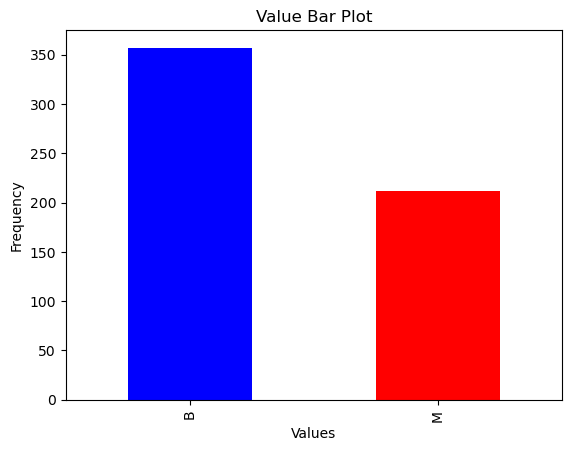

In [25]:
value_counts = y.value_counts()

# Create a bar plot with custom colors
colors = ['blue', 'red']  # Assign colors to "m" and "b" respectively
ax = value_counts.plot(kind='bar', color=colors)

# Customize the plot
plt.title('Value Bar Plot')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Show the bar plot
plt.show()

/var/folders/gc/dm7c6wn54kv89c8pyshdv6g80000gn/T/ipykernel_1969/280908789.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var/folders/gc/dm7c6wn54kv89c8pyshdv6g80000gn/T/ipykernel_1969/280908789.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var/fol

/var/folders/gc/dm7c6wn54kv89c8pyshdv6g80000gn/T/ipykernel_1969/280908789.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var/folders/gc/dm7c6wn54kv89c8pyshdv6g80000gn/T/ipykernel_1969/280908789.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(v, ax=axs[index])
/var/fol

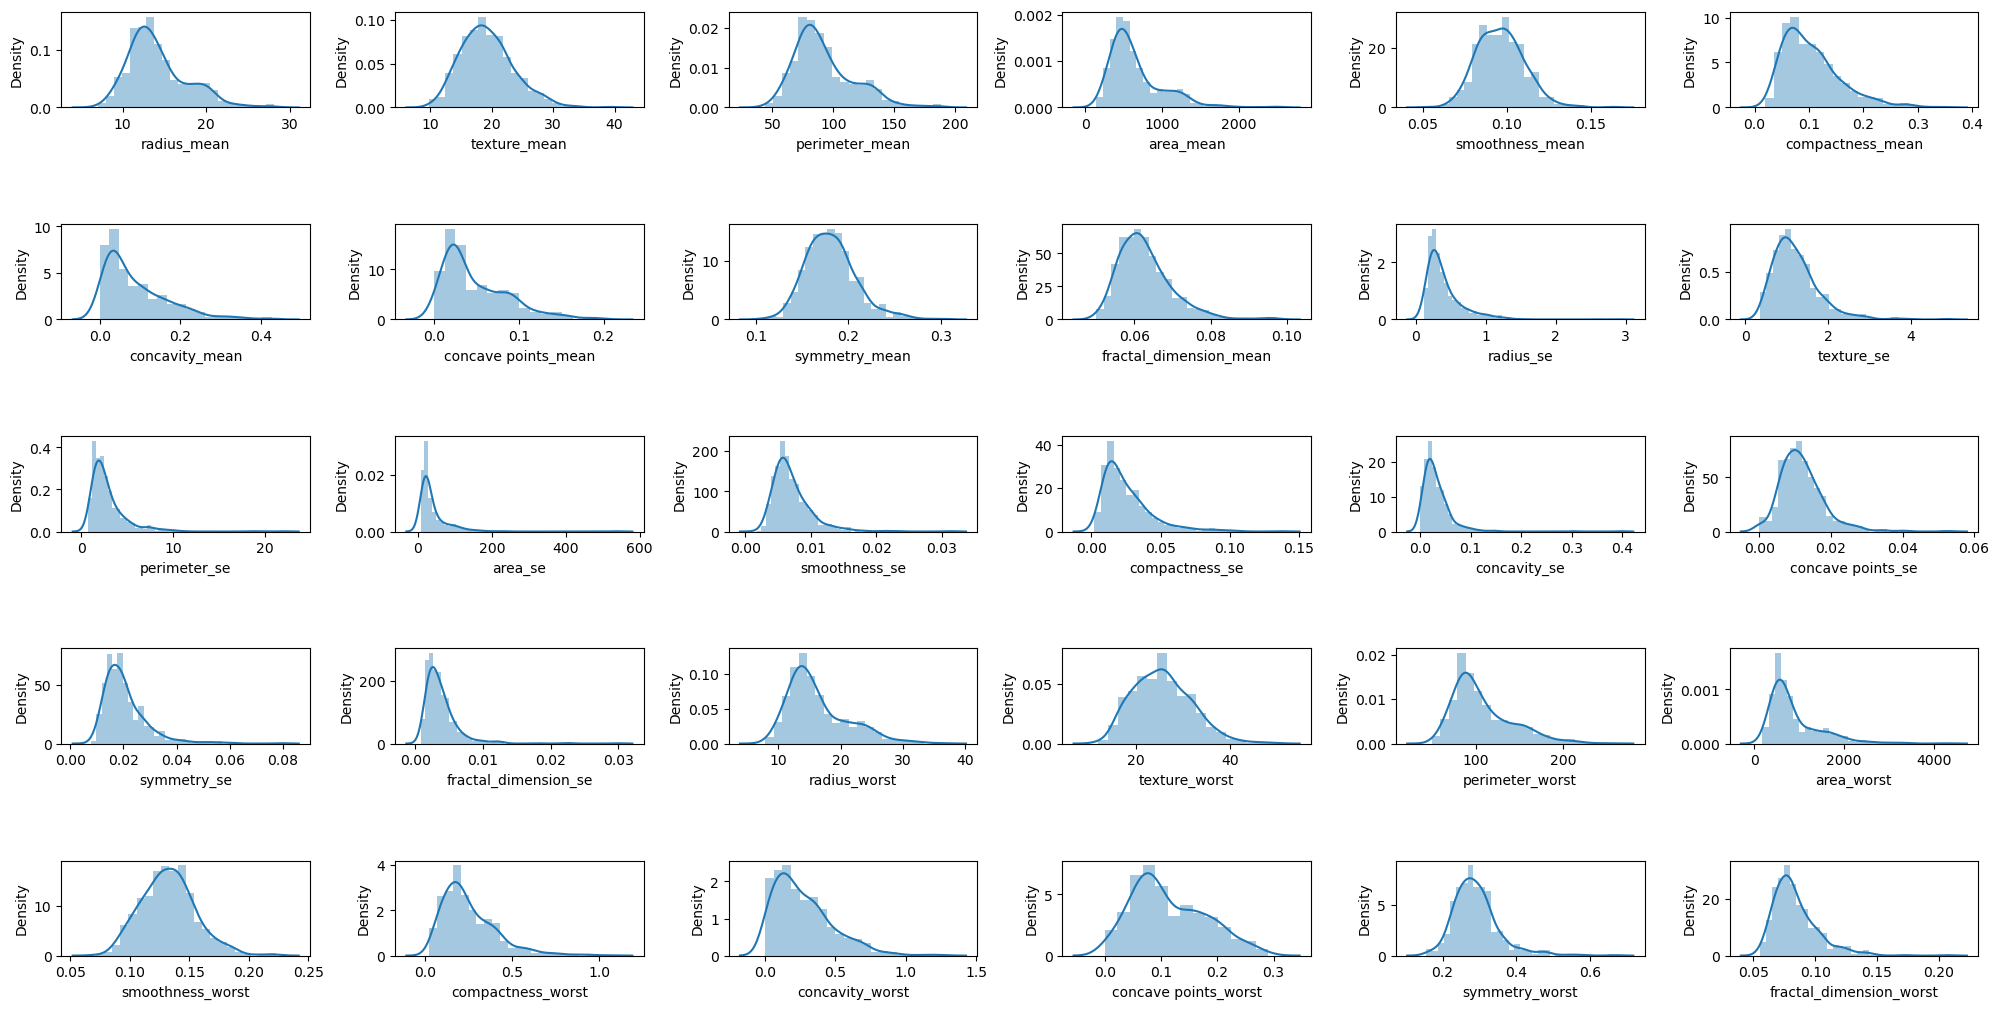

In [42]:
fig, axs = plt.subplots(ncols=6, nrows=5, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in X.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

<Axes: >

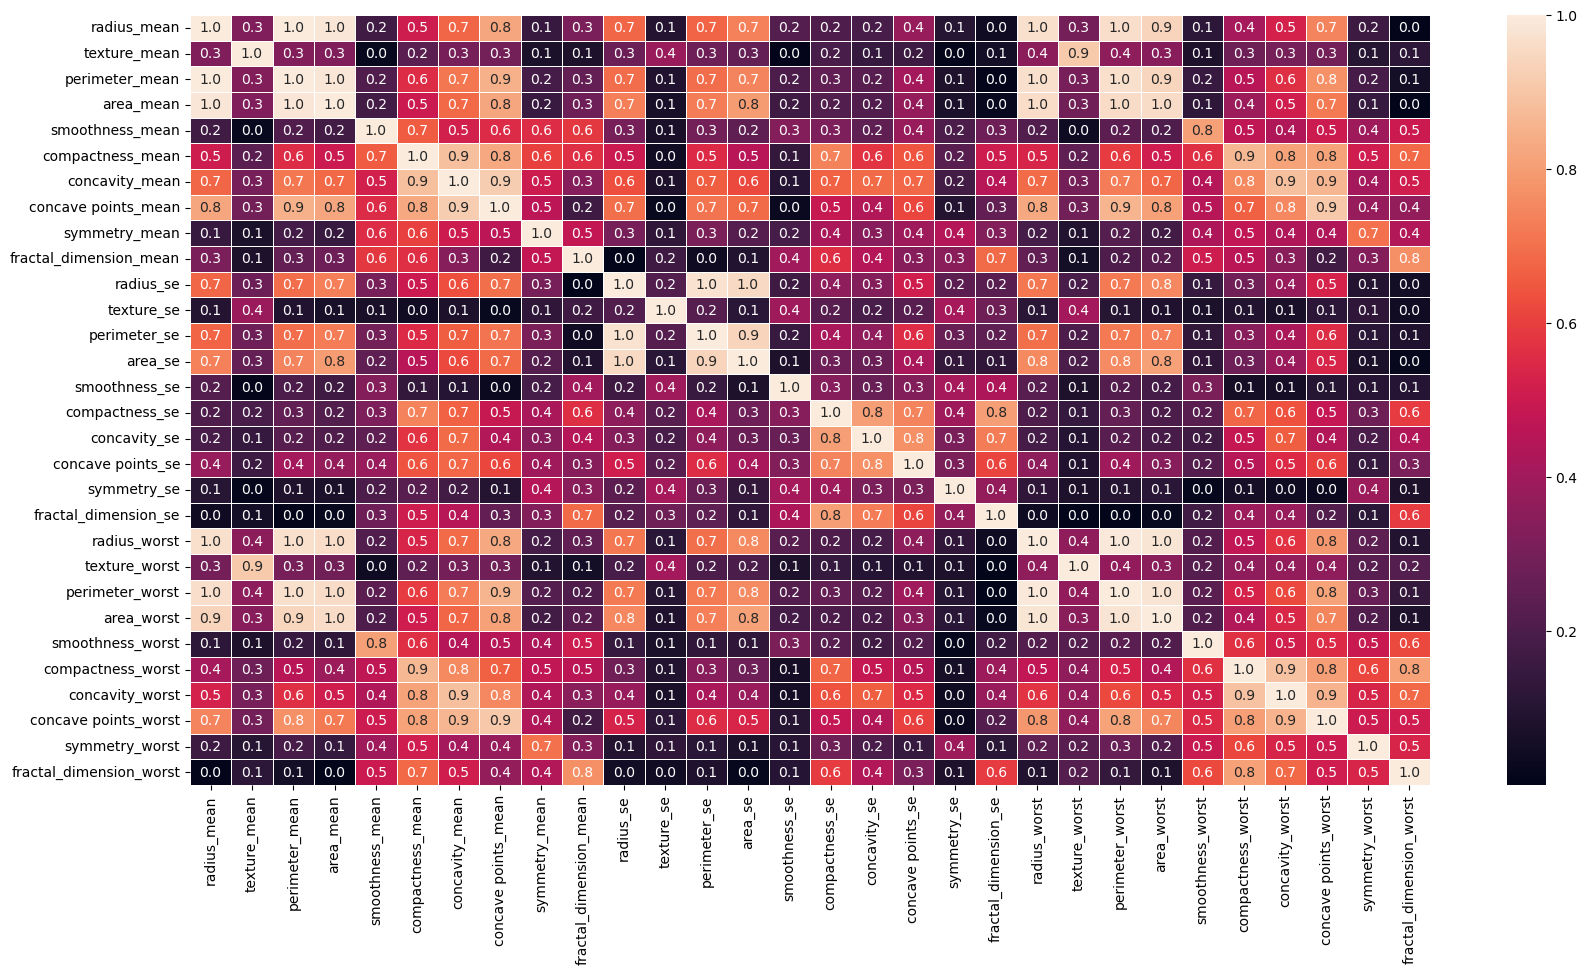

In [41]:
plt.figure(figsize=(20, 10))
sns.heatmap(X.corr().abs(),  annot=True, linewidths=.5, fmt= '.1f')

In this heatmap, we observe strong correlations among multiple variables. To address this, two common approaches can be considered.

The first approach involves Principal Component Analysis (PCA), which allows the machine to autonomously determine which information to retain by reducing the dimensionality of the data.

The second approach involves creating two models. One model includes all the variables, while the other model reduces correlated variables to a single representative variable. The performance of these models can then be compared to determine the most effective approach for handling highly correlated variables.

I start by eliminating the correlated variables, training my model with the reduced dataset. Following this, I implement PCA to further analyze the data and extract essential information."



In [46]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
X_1 = X.drop(drop_list1,axis = 1 )         #we will use X later 
X_1.head()

,texture_mean,area_mean,smoothness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,texture_se,area_se,smoothness_se,concavity_se,symmetry_se,fractal_dimension_se,smoothness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,10.38,1001.0,0.11840,0.3001,0.2419,0.07871,0.9053,153.40,0.006399,0.05373,0.03003,0.006193,0.1622,0.7119,0.4601,0.11890
1,17.77,1326.0,0.08474,0.0869,0.1812,0.05667,0.7339,74.08,0.005225,0.01860,0.01389,0.003532,0.1238,0.2416,0.2750,0.08902
2,21.25,1203.0,0.10960,0.1974,0.2069,0.05999,0.7869,94.03,0.006150,0.03832,0.02250,0.004571,0.1444,0.4504,0.3613,0.08758
3,20.38,386.1,0.14250,0.2414,0.2597,0.09744,1.1560,27.23,0.009110,0.05661,0.05963,0.009208,0.2098,0.6869,0.6638,0.17300
4,14.34,1297.0,0.10030,0.1980,0.1809,0.05883,0.7813,94.44,0.011490,0.05688,0.01756,0.005115,0.1374,0.4000,0.2364,0.07678


<Axes: >

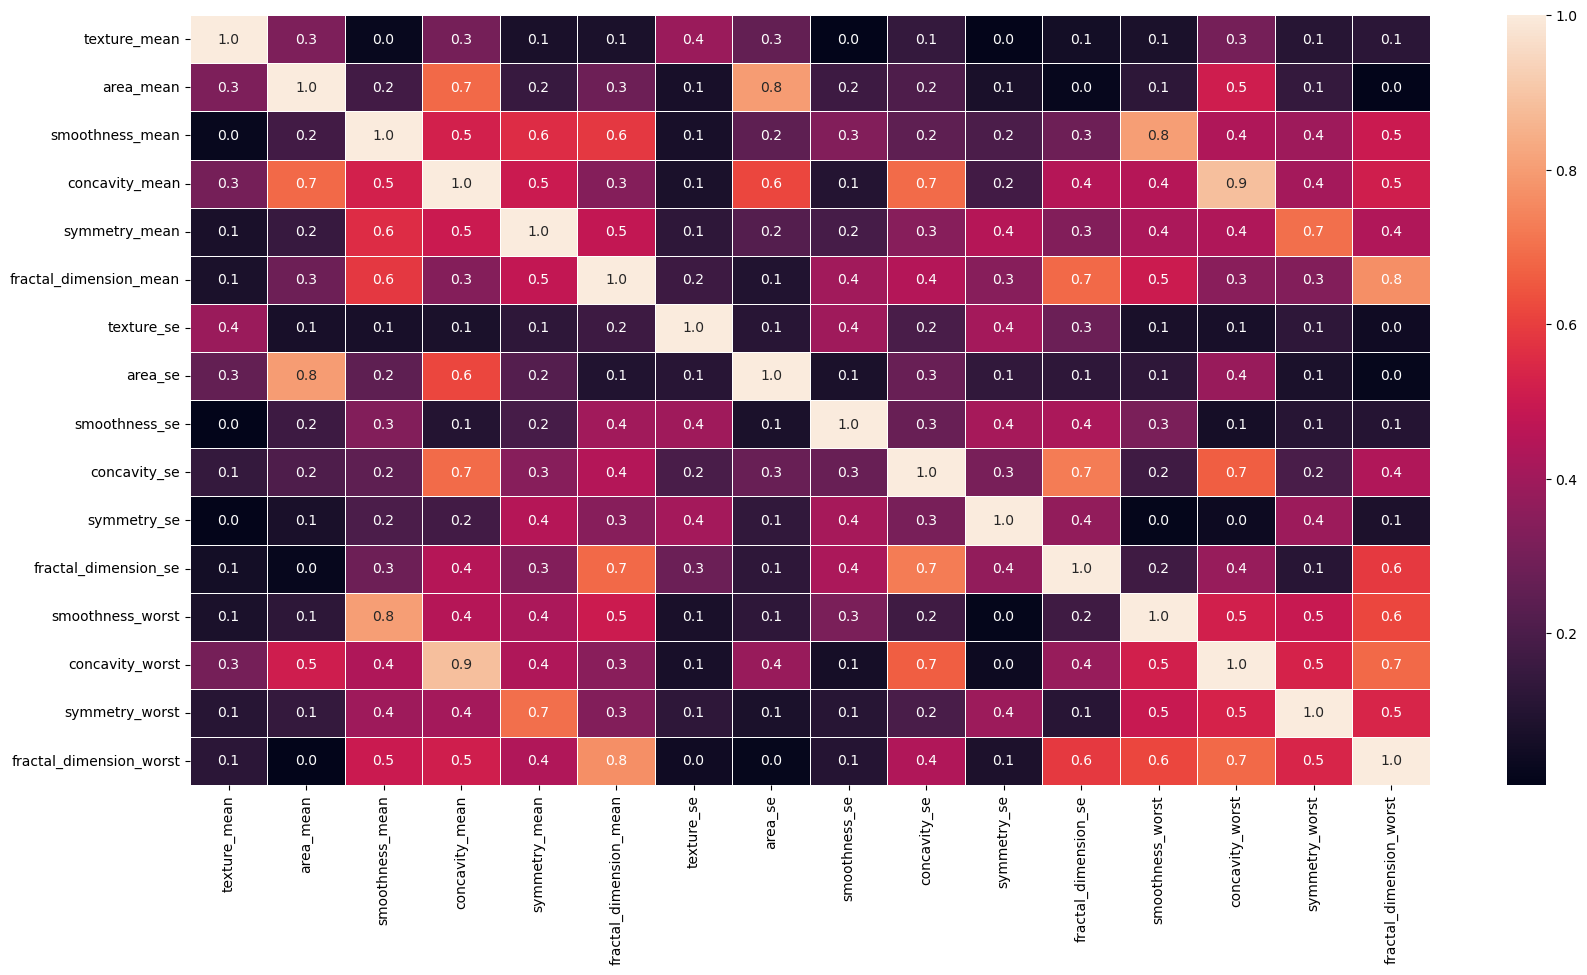

In [47]:
plt.figure(figsize=(20, 10))
sns.heatmap(X_1.corr().abs(),  annot=True, linewidths=.5, fmt= '.1f')

After removing correlated features, the correlation matrix above demonstrates that there are no longer any correlations between the remaining features.

##  Splitting the dataset into the Training set and Test set



In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_1, y, test_size = 0.25, random_state = 4)

## Feature Scaling

In [52]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [53]:
print(X_train)

[[ 1.20706138 -0.16292536  1.50225842 ...  0.33488896  1.22050305
   1.92033957]
 [-1.57272774 -0.54493584  0.4805382  ... -0.68862332 -0.12446418
  -0.86496108]
 [-0.37581028  1.22860144  1.02189742 ...  2.23166442  1.46207483
   0.46409917]
 ...
 [-0.82149547 -0.13220221 -1.28383539 ... -0.98337955 -1.25234326
  -0.89854545]
 [-0.93866014 -0.87680383 -0.65402874 ... -1.28292078 -0.31543647
  -1.19915311]
 [ 0.22149978  3.21401252  3.6753201  ...  1.49381685  0.52027132
  -0.18336349]]


## Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 4)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=4)

In [63]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(-1, 1), y_test.values.reshape(-1, 1)), axis=1))


[['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'B']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'M']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'M']
 ['B' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['M' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['B' 'B']
 ['M' 'M']
 ['B' 'B']
 ['B' 'B']

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90  5]
 [ 2 46]]


0.951048951048951

## Recursive feature elimination with cross validation and random forest classification¶


In [65]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
classifier = RandomForestClassifier()
rfecv = RFECV(estimator=classifier, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(x_train, y_train)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', x_train.columns[rfecv.support_])

Optimal number of features : 12
Best features : Index(['texture_mean', 'area_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'area_se', 'smoothness_se', 'fractal_dimension_se',
       'smoothness_worst', 'concavity_worst', 'symmetry_worst',
       'fractal_dimension_worst'],
      dtype='object')


## GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 97.65 %
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
810 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
547 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/mohamadrezasalehi/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 637, in _validate_params

In [81]:
best_params = {
    'bootstrap': True,
    'max_features': 'sqrt',
    'min_samples_leaf': 2,
    'min_samples_split': 5,
    'n_estimators': 100
}

classifier = RandomForestClassifier(**best_params)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[90  5]
 [ 3 45]]


0.9440559440559441

The observed reduction in accuracy, by nearly 2%, suggests the possibility of overfitting as the underlying cause.